<a href="https://colab.research.google.com/github/prakhar-luke/GEU_projects/blob/main/finalV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [130]:
# Sentiment Analysis using Twitter

In [131]:
# Libraries used
import tweepy
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
import re
from wordcloud import WordCloud
plt.style.use('fivethirtyeight')

In [132]:
APIKey="45bClwJKA7A9oYkpwznWeExpR"
APISecretKey="2ZCUH8pWC1edht76JctAs3Ws8iWhVE4yONXyQJhFLh8gERxDLz"
AccessToken="948758986366451712-KAuqMqjvAGuzvai3JBtNduvuOaQAyXs"
AccessTokenSecret="37EpjIW2W9IEODtTYelTxPkWP3zGSGSqPuAerZTMw1RLg"

In [133]:
authenticate = tweepy.OAuthHandler(APIKey,APISecretKey)
authenticate.set_access_token(AccessToken,AccessTokenSecret)
api = tweepy.API(authenticate)

In [134]:
posts = api.user_timeline(screen_name = 'lockdown', count = 100, lang = 'eg', tweet_mode = 'extended')
i = 1
for tweet in posts: 
  print(str(i) +') ' + tweet.full_text + '\n')
  i+=1

1) RT @RodCoaching: Welcome back to college. @LockDown y’all got a good one

2) Let’s Go 3…7!! https://t.co/vHyF0w4snx

3) Ahead of the game!! https://t.co/2BetLJVZ2t

4) Elite Camp 2 on July 31st…Let the Ball’n Begin!! #Elite #GoGriz #MontanaGriz https://t.co/C29lgjiw6h

5) RT @UMGRIZZLIES: Who else is ready to pack this place again!?

𝙎𝙄𝙉𝙂𝙇𝙀 𝙂𝘼𝙈𝙀 tickets go on sale TOMORROW!

https://t.co/t4dReQFyk6 | Adams Ce…

6) RIP Biz Markee!! https://t.co/1EOnzUcERC

7) Go Griz!! https://t.co/fVzKulE8B9

8) RT @MontanaGrizFB: Back in business 💪

Time to finish the summer strong!

#GoGriz #RTD https://t.co/VJLMyYFvqI

9) RT @UMGRIZZLIES: The work never stops.

#GoGriz https://t.co/bMIr7KbZFd

10) Lights On before “Lights Out!” @MontanaGrizFB https://t.co/6QnDsrshN6

11) RT @GMofCFB: CFB Teams with the Brightest Future in Each State

(FBS and FCS only) https://t.co/Mz3DGSeVTL

12) RT @MontanaGrizFB: 🇺🇸 Happy Independence Day from Griz Football! 🇺🇸

#4thofJuly  #GoGriz https://t.co/M0JxWmfnHH

13)

In [135]:
df = pd.DataFrame([tweet.full_text for tweet in posts],columns = ['Tweets'])
df

,Tweets
0,RT @RodCoaching: Welcome back to college. @Loc...
1,Let’s Go 3…7!! https://t.co/vHyF0w4snx
2,Ahead of the game!! https://t.co/2BetLJVZ2t
3,Elite Camp 2 on July 31st…Let the Ball’n Begin...
4,RT @UMGRIZZLIES: Who else is ready to pack thi...
...,...
95,JB on the “House Call”...Friday Night Lit 🔥 @S...
96,Keep Ball’n 🏈 Siz...Next Up!! @SWiltfong247 @D...
97,Ohhh well isn’t that interesting!!
98,@NFL @RapSheet Ohh My..we’ll lookie here AB! h...


In [136]:
def cleanText(text):
  text = re.sub('@[AaZa-z0-9]+','',text) #removing mentions
  text = re.sub("#",'',text)  #removing #
  text = re.sub('Rt[\s]+','',text)  #removing Retweets
  tezt = re.sub('https?:\/\/\S+','',text)  #removing links
  return text

In [137]:
df['Tweets'] = df['Tweets'].apply(cleanText)

In [138]:
df

,Tweets
0,RT @RodCoaching: Welcome back to college. @Loc...
1,Let’s Go 3…7!! https://t.co/vHyF0w4snx
2,Ahead of the game!! https://t.co/2BetLJVZ2t
3,Elite Camp 2 on July 31st…Let the Ball’n Begin...
4,RT @UMGRIZZLIES: Who else is ready to pack thi...
...,...
95,JB on the “House Call”...Friday Night Lit 🔥 @S...
96,Keep Ball’n 🏈 Siz...Next Up!! @SWiltfong247 @D...
97,Ohhh well isn’t that interesting!!
98,@NFL @RapSheet Ohh My..we’ll lookie here AB! h...


In [139]:
# create a function to get the subjectivity of all the tweets
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

# create a function to get the polarity of all the tweets
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

# creating 2 columns 'Subjectivity' and 'Polarity'
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

In [140]:
df

,Tweets,Subjectivity,Polarity
0,RT @RodCoaching: Welcome back to college. @Loc...,0.5,0.50000
1,Let’s Go 3…7!! https://t.co/vHyF0w4snx,0.0,0.00000
2,Ahead of the game!! https://t.co/2BetLJVZ2t,0.4,-0.62500
3,Elite Camp 2 on July 31st…Let the Ball’n Begin...,0.0,0.00000
4,RT @UMGRIZZLIES: Who else is ready to pack thi...,0.5,0.31250
...,...,...,...
95,JB on the “House Call”...Friday Night Lit 🔥 @S...,0.0,0.00000
96,Keep Ball’n 🏈 Siz...Next Up!! @SWiltfong247 @D...,0.0,0.00000
97,Ohhh well isn’t that interesting!!,0.5,0.78125
98,@NFL @RapSheet Ohh My..we’ll lookie here AB! h...,0.0,0.00000


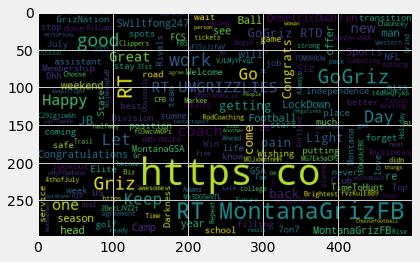

In [141]:
# Word Cloud Visualization
allwords = ' '.join([i for i in df['Tweets']])
Cloud = WordCloud(width = 500, height = 300, random_state = 0, max_font_size = 50).generate(allwords)

plt.imshow(Cloud)
plt.show()

In [142]:
# create a funtion to compute negative, neutral and positive 

def gteAnalysis(score):
  if score<0:
    return 'Negative'
  elif score==0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(gteAnalysis)
df

,Tweets,Subjectivity,Polarity,Analysis
0,RT @RodCoaching: Welcome back to college. @Loc...,0.5,0.50000,Positive
1,Let’s Go 3…7!! https://t.co/vHyF0w4snx,0.0,0.00000,Neutral
2,Ahead of the game!! https://t.co/2BetLJVZ2t,0.4,-0.62500,Negative
3,Elite Camp 2 on July 31st…Let the Ball’n Begin...,0.0,0.00000,Neutral
4,RT @UMGRIZZLIES: Who else is ready to pack thi...,0.5,0.31250,Positive
...,...,...,...,...
95,JB on the “House Call”...Friday Night Lit 🔥 @S...,0.0,0.00000,Neutral
96,Keep Ball’n 🏈 Siz...Next Up!! @SWiltfong247 @D...,0.0,0.00000,Neutral
97,Ohhh well isn’t that interesting!!,0.5,0.78125,Positive
98,@NFL @RapSheet Ohh My..we’ll lookie here AB! h...,0.0,0.00000,Neutral


In [143]:
df['Analysis'].value_counts()

Neutral     55
Positive    43
Negative     2
Name: Analysis, dtype: int64

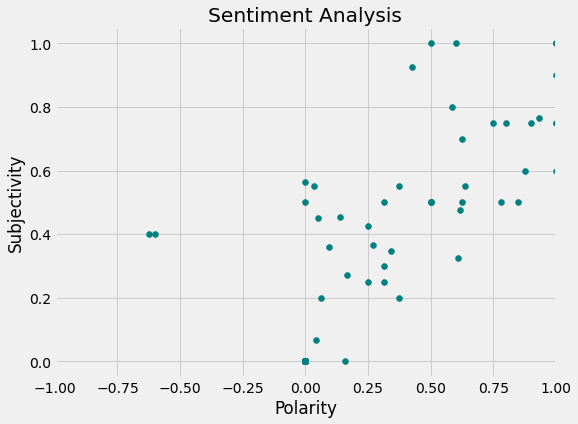

In [144]:
# plotting the scatter plot
plt.figure(figsize = (8,6))

for i in range (0,df.shape[0]):
  plt.scatter(df['Polarity'][i],df['Subjectivity'][i],color = 'Teal')

plt.title("Sentiment Analysis")
plt.xlim(-1,1)
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [145]:
df[df['Analysis']=='Neutral']

,Tweets,Subjectivity,Polarity,Analysis
1,Let’s Go 3…7!! https://t.co/vHyF0w4snx,0.0000,0.0,Neutral
3,Elite Camp 2 on July 31st…Let the Ball’n Begin...,0.0000,0.0,Neutral
5,RIP Biz Markee!! https://t.co/1EOnzUcERC,0.0000,0.0,Neutral
6,Go Griz!! https://t.co/fVzKulE8B9,0.0000,0.0,Neutral
8,RT @UMGRIZZLIES: The work never stops.\n\nGoGr...,0.0000,0.0,Neutral
9,Lights On before “Lights Out!” @MontanaGrizFB ...,0.0000,0.0,Neutral
10,RT @GMofCFB: CFB Teams with the Brightest Futu...,0.5625,0.0,Neutral
13,RT @MontanaGrizFB: Holiday weekend mood 😤🐻💪🇺🇸\...,0.0000,0.0,Neutral
14,We do nothing halfway!! @MontanaGrizFB GoGriz ...,0.0000,0.0,Neutral
17,RT @MontanaGrizFB: Always 👏 Be 👏 Competing 👏\n...,0.0000,0.0,Neutral


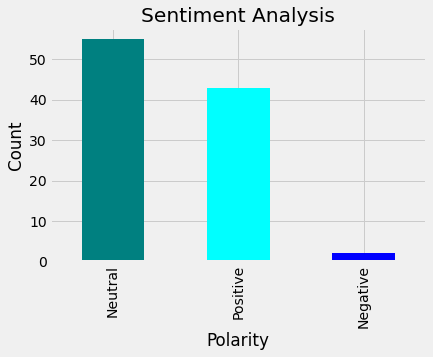

In [146]:
# bar graphs

df['Analysis'].value_counts().plot(kind='bar',color=['teal', 'cyan', 'blue'])
plt.title("Sentiment Analysis")
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.show()